In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## idea 1

In [92]:
# load dataset
true_news = pd.read_csv('idea1_nlp/true_news.csv')
fake_news = pd.read_csv('idea1_nlp/fake_news.csv')

In [94]:
true_news['label'] = 'true'
fake_news['label'] = 'false'

In [95]:
# check shape, rows and columns
true_news.shape, fake_news.shape

((21417, 5), (23481, 5))

In [96]:
# check column names
true_news.columns, fake_news.columns

(Index(['title', 'text', 'subject', 'date', 'label'], dtype='object'),
 Index(['title', 'text', 'subject', 'date', 'label'], dtype='object'))

In [97]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB


In [98]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  object
dtypes: object(5)
memory usage: 917.4+ KB


In [99]:
true_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [100]:
fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",false
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",false
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",false
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",false
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",false


In [102]:
combine = pd.concat([fake_news, true_news])
combine.shape

(44898, 5)

In [105]:
df_1 = combine.sample(len(combine))
df_1.head()

,title,text,subject,date,label
12349,CEO Who Threatened To Kill Trump With Sniper R...,The former CEO of a local cybersecurity firm i...,politics,"Nov 20, 2016",false
15995,Russia invites Syrian Kurds to people's congre...,BEIRUT (Reuters) - Russia has invited the Kurd...,worldnews,"October 31, 2017",true
10185,Clinton: More Europe can do to help U.S. comba...,(Reuters) - Democratic presidential front-runn...,politicsNews,"March 23, 2016",true
21791,(VIDEO) SICKENING CHALLENGE GOES VIRAL: DISRES...,"A sick new challenge is going viral, urging ...",left-news,"May 1, 2015",false
4121,BREAKING: One Of Trump’s Guests For The Last ...,There s been news erupting all over the place ...,News,"October 19, 2016",false


## idea 2

In [36]:
labels = pd.read_csv('idea2_cv/chineseMNIST/chinese_mnist.csv')
labels.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [37]:
from PIL import Image
import os

In [ ]:
images_folder = 'idea2_cv/chineseMNIST/data/data/'

# Function to read and convert images, and associate labels from the CSV
def read_and_convert_images(images_folder):
    image_data = []

    for filename in os.listdir(images_folder):
        image_path = os.path.join(images_folder, filename)

        suite_id, sample_id, code = map(int, filename.split('.')[0].split('_')[1:4])

        label_info = labels[(labels['suite_id'] == suite_id) &
                                    (labels['sample_id'] == sample_id) &
                                    (labels['code'] == code)][['value', 'character']]

        image = Image.open(image_path)

        image_array = np.array(image).reshape(-1)

        image_data.append({'Image_Array': image_array, 'Label': label_info.value.iloc[0], 'character': label_info.character.iloc[0]})

    return image_data

# Call the function to read and convert images
image_data = read_and_convert_images(images_folder)

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

In [ ]:
df.head()

,Image_Array,Label,character
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,六
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,百
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,九
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,零
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,二


In [ ]:
image_columns = pd.DataFrame(df['Image_Array'].to_list(), columns=[f'Pixel_{i}' for i in range(df['Image_Array'].iloc[0].size)])

In [41]:
image_columns.head()

Pixel_0  Pixel_1  Pixel_2  Pixel_3  Pixel_4  Pixel_5  Pixel_6  Pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Pixel_8  Pixel_9  Pixel_10  Pixel_11  Pixel_12  Pixel_13  Pixel_14  \
0        0        0         0         0         0         0         0   
1        0        0         0         0         0         0         0   
2        0        0         0         0         0         0         0   
3        0        0         0         0         0         0         0   
4        0        0         0         0         0         0         0   

   Pixel_15  Pixel_16  Pixel_17  Pixel_18  Pixel_19  Pixel_20  Pixel_21  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_22  Pixel_23  Pixel_24  Pixel_25  Pixel_26  Pixel_27  Pixel_28  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_29  Pixel_30  Pixel_31  Pixel_32  Pixel_33  Pixel_34  Pixel_35  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_36  Pixel_37  Pixel_38  Pixel_39  Pixel_40  Pixel_41  Pixel_42  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_43  Pixel_44  Pixel_45  Pixel_46  Pixel_47  Pixel_48  Pixel_49  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_50  Pixel_51  Pixel_52  Pixel_53  Pixel_54  Pixel_55  Pixel_56  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_57  Pixel_58  Pixel_59  Pixel_60  Pixel_61  Pixel_62  Pixel_63  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         

In [42]:
image_columns.shape

(15000, 4096)

In [43]:
final_df = pd.concat([image_columns, df.Label, df.character], axis=1)

In [44]:
final_df.head()

Pixel_0  Pixel_1  Pixel_2  Pixel_3  Pixel_4  Pixel_5  Pixel_6  Pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Pixel_8  Pixel_9  Pixel_10  Pixel_11  Pixel_12  Pixel_13  Pixel_14  \
0        0        0         0         0         0         0         0   
1        0        0         0         0         0         0         0   
2        0        0         0         0         0         0         0   
3        0        0         0         0         0         0         0   
4        0        0         0         0         0         0         0   

   Pixel_15  Pixel_16  Pixel_17  Pixel_18  Pixel_19  Pixel_20  Pixel_21  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_22  Pixel_23  Pixel_24  Pixel_25  Pixel_26  Pixel_27  Pixel_28  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_29  Pixel_30  Pixel_31  Pixel_32  Pixel_33  Pixel_34  Pixel_35  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_36  Pixel_37  Pixel_38  Pixel_39  Pixel_40  Pixel_41  Pixel_42  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_43  Pixel_44  Pixel_45  Pixel_46  Pixel_47  Pixel_48  Pixel_49  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_50  Pixel_51  Pixel_52  Pixel_53  Pixel_54  Pixel_55  Pixel_56  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Pixel_57  Pixel_58  Pixel_59  Pixel_60  Pixel_61  Pixel_62  Pixel_63  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         

check the first 5 rows to make sure they are correct

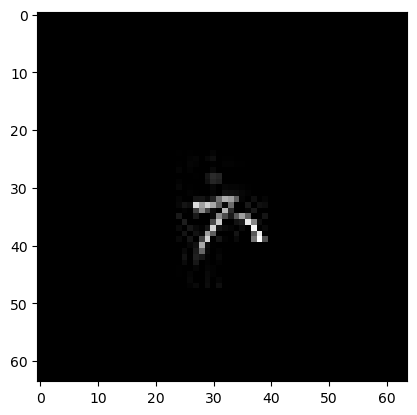

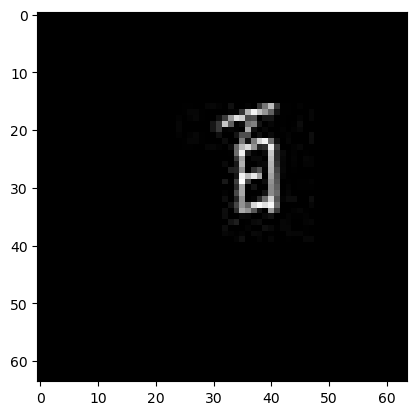

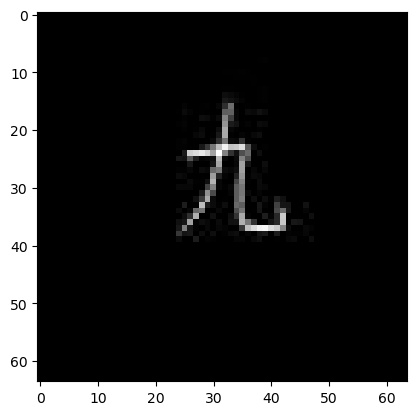

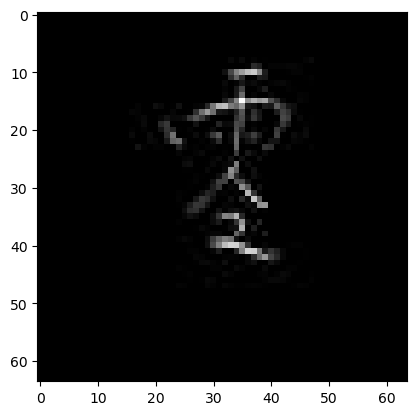

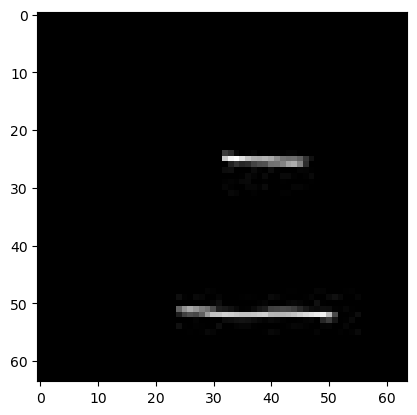

In [90]:
for i in range(5):  
    ex = final_df.iloc[i].values[:-2].astype('float')
    plt.imshow(ex.reshape(64,64), cmap='gray')
    plt.show()

In [91]:
final_df.to_csv('idea2_cv/chinesemnist.csv')